In [18]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait                    
from selenium.webdriver.support import expected_conditions as EC           
from selenium.webdriver.common.by import By 
driver =webdriver.Chrome(executable_path="D:\chromedriver_win32\chromedriver.exe")
driver.get('https://www.instagram.com/?hl=en')
driver.implicitly_wait(5)
login_username=driver.find_element_by_name("username")
login_password=driver.find_element_by_name('password')
login_username.send_keys('username')
login_password.send_keys('password')
login_password.submit()
wait = WebDriverWait(driver, 20)

In [19]:
search_bar=driver.find_element_by_class_name("XTCLo")
search_bar.send_keys('food')
food_name=driver.find_elements_by_class_name("Ap253")
food_list=[]
count=0
for i in food_name:
    if i.get_attribute('innerHTML')[0]=='#':
        continue
    elif count!=10:
        food_list.append(i.get_attribute('innerHTML'))
        count+=1
food_list

['foodnetwork',
 'foodtalkindia',
 'foodie_incarnate',
 'food_belly11',
 'foodconnectindia',
 'yourfoodlab',
 'food',
 'dilsefoodie',
 'food_lunatic',
 'foodlookingdigital']

In [20]:
dict={}
search_bar=driver.find_element_by_class_name("XTCLo")
for i in food_list:
    if i=='food':
        continue
    search_bar=driver.find_element_by_class_name("XTCLo")
    search_bar.clear()
    search_bar=driver.find_element_by_class_name("XTCLo")
    search_bar.send_keys(i)
    #driver.implicitly_wait(10)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))
    b.click()
    #driver.find_element_by_class_name("z556c").click()
    followers=driver.find_elements_by_class_name("g47SY")
    for j in followers:
        if j.get_attribute('title')!='':
            a=j.get_attribute('title')
    li=a.split(',')
    b=''.join(li)
    c=int(b)
    dict[i]=c
    driver.back()
sort_orders = sorted(dict.items(), key=lambda x: x[1], reverse=True)[:5]
for i in sort_orders:
    print(i[0],"--->",i[1])

foodnetwork ---> 10405817
yourfoodlab ---> 1325276
dilsefoodie ---> 565115
foodtalkindia ---> 298982
foodie_incarnate ---> 209947


In [21]:
dict={}
for i in sort_orders:
    handle=i[0]
    search_bar=driver.find_element_by_class_name("XTCLo")
    search_bar.clear()
    search_bar.send_keys(handle)
    #driver.implicitly_wait(10)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))
    b.click()
    #driver.find_element_by_class_name("z556c").click()
    #driver.implicitly_wait(10)
    c = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
    c.click()
    #driver.find_element_by_class_name("_9AhH0").click()
    count=0
    while True:
        time=driver.find_element_by_class_name("_1o9PC")
        a=time.get_attribute('innerHTML')
        b=a.split(' ')
        if (b[1]=='hours'or b[1]=='minutes'):
            count+=1
        elif (b[0]=='1'or b[0]=='2'or b[0]=='3'):
            count+=1
        else:
            break
        driver.find_element_by_class_name("_65Bje").click()
    driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
    dict[handle]=count
dict

{'foodnetwork': 40,
 'yourfoodlab': 4,
 'dilsefoodie': 7,
 'foodtalkindia': 5,
 'foodie_incarnate': 5}

In [22]:
insta_handle=[]
posts=[]
followers=[]
for i in sort_orders:
    insta_handle.append(i[0])
    followers.append(i[1])
for i in dict:
    posts.append(dict[i])
print(insta_handle,posts,followers)

['foodnetwork', 'yourfoodlab', 'dilsefoodie', 'foodtalkindia', 'foodie_incarnate'] [40, 4, 7, 5, 5] [10405817, 1325276, 565115, 298982, 209947]


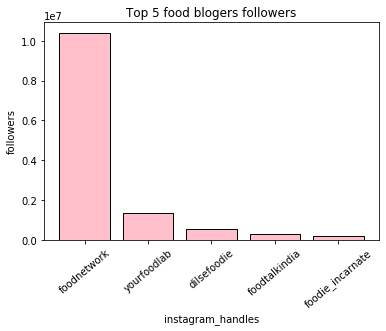

In [23]:
import matplotlib.pyplot as plt
plt.bar(insta_handle,followers,color='pink',edgecolor='black')
plt.xticks(rotation=40)
plt.xlabel('instagram_handles')
plt.ylabel('followers')
plt.title('Top 5 food blogers followers')
plt.show()

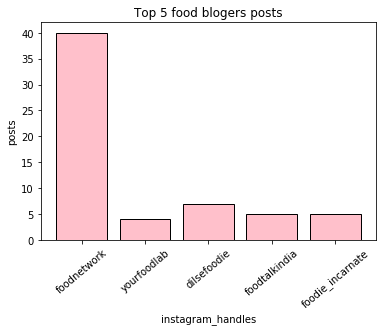

In [24]:
import matplotlib.pyplot as plt
plt.bar(insta_handle,posts,color='pink',edgecolor='black')
plt.xticks(rotation=40)
plt.xlabel('instagram_handles')
plt.ylabel('posts')
plt.title('Top 5 food blogers posts')
plt.show()

In [29]:
import time
top_5_handles={}
for handle in insta_handle:
    top_10_post={}
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')           
    search.send_keys(handle)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))                  
    first_search = driver.find_element_by_class_name('z556c')
    first_search.click()
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))    
    a.clear()
    for i in range(1):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')                      
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                           
    for j in range(1):
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')                     
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')
    post=driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]')                       
    #driver.execute_script('window.scrollBy(0,80);')                                              
    #driver.implicitly_wait(10) 
    #wait = WebDriverWait(driver, 10)
    post.click() 
    for i in range(10):                                                                            
        data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')                   
        value=data.text                                                                             
        top_10_post["post"+str(i+1)]=value    
        driver.find_element_by_class_name("_65Bje").click()
    driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()    
    top_5_handles[handle]=top_10_post

for key in top_5_handles.keys():
    p=top_5_handles[key]
    print(key)
    i=0
    for key in p:
        print("**************************post",i+1,"****************************************")
        print(p[key])
        i=i+1
        print()

'for key in top_5_handles.keys():\n    p=top_5_handles[key]\n    print(key)\n    i=0\n    for key in p:\n        print("**************************post",i+1,"****************************************")\n        print(p[key])\n        i=i+1\n        print()'

In [31]:
totalfreq={}
all_word=[]
for key in top_5_handles.keys():
    p=top_5_handles[key]
    i=0
    for key in p:
        data=p[key]
        s=data.split()
        for k in s:
            if k[0]=='#':                                                 
                ans=k[1:]
                all_word.append(ans)
                if ans in totalfreq:
                    totalfreq[ans]+=1
                else:
                    totalfreq[ans]=1
print(totalfreq) 
print()
print(all_word)

{'Chopped': 1, 'SharkWeek': 1, 'BestThingIEverAte': 1, 'TheKitchen': 1, 'recipe': 7, 'foodie': 7, 'sandwiches': 1, 'sandwichesofinstagram': 1, 'bombaysandwich': 1, 'foodiesofinstagram': 3, 'foodpics': 1, 'foodlover': 1, 'cravings': 1, 'streetfood': 6, 'indiancuisine': 6, 'comfortfood': 5, 'CookWithATwist': 3, 'stayhome': 1, 'staysafe': 1, 'contestalert': 2, 'sanjyotkeer': 3, 'MorphyRichards': 1, 'samosa': 1, 'samosalover': 1, 'chinese': 1, 'foodstagram': 2, 'mumbaifood': 2, 'mumbaistreetfood': 3, 'indianfood': 1, 'recipeoftheday': 1, 'paneer': 1, 'paneerrecipes': 1, 'paneerlove': 1, 'foodporn': 1, 'foodography': 1, 'dhabastyle': 1, 'dhabafood': 1, 'recipes': 1, 'momos': 1, 'momorecipe': 1, 'mumbai_ig': 1, 'mumbaifoodies': 1, 'foodphotos': 1, 'dilsefoodie': 9, 'AwesomenessWithSamsung': 1, 'AwesomeCity': 1, 'GalaxyA31': 1, 'GalaxyA51': 1, 'NewInTown': 1, 'HomeGrown': 1, 'Jameson': 1, 'IrishWhiskey': 1, 'AlwaysInToMixIn': 1, 'TrendTalk': 1, 'farzi': 1, 'InternationalBeerDay': 1, 'beerstag

In [32]:
import pandas as pd
import numpy as np
li_2d=[]
for i in totalfreq:
    s=[]
    s.append(i)
    s.append(totalfreq[i])
    li_2d.append(s)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('Frequency.csv',index=False)
print(dataset)

                        Word Frequency
0                    Chopped         1
1                  SharkWeek         1
2          BestThingIEverAte         1
3                 TheKitchen         1
4                     recipe         7
..                       ...       ...
58             Refrigerator.         1
59           foodieincarnate         7
60  lndiaStoreKaregaContest2         1
61  LGlndependenceDaySpecial         1
62           Foodieincarnate         3

[63 rows x 2 columns]


In [33]:
t=1
top_5_hash=[]
top_5_times=[]
for i in sorted (totalfreq.items(), key = lambda kv: kv[1],reverse=True):
    top_5_hash.append(i[0])
    top_5_times.append(i[1])
    print(i)
    t+=1
    if t>5:
        break


('dilsefoodie', 9)
('recipe', 7)
('foodie', 7)
('foodieincarnate', 7)
('streetfood', 6)


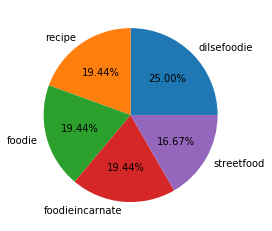

In [34]:
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()

In [71]:
from selenium.common.exceptions import NoSuchElementException               #to check for exception
top_5_post_like={}                                                          #dictionary for top five post
for t in insta_handle:                                                        
    post_likes={}
    count=0
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  #input box
    data.send_keys(t)                                                       #send handle
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')   #first search
    data.click()
    driver.implicitly_wait(10)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')                  #scroll by 2000
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]') #fetch the elements
    for j in range(12): 
        driver.execute_script('window.scrollBy(0,-2000);')                 #scroll by 2000
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')                       #make in proper place f post
    final=data
    driver.implicitly_wait(10)
    for p in range(len(final)):
        if count>9:
            break  
        try:
            data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')  #fetch post
            driver.execute_script('window.scrollBy(0,80);')
            final=len(data)
            driver.implicitly_wait(10)
            #data[p].click()
            #driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
            driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]').click()
            driver.implicitly_wait(10)
            data=driver.find_element_by_xpath('//button[contains(@class,"sqdOP ")]//span')  #find likes on post
            val=data.text
            driver.find_element_by_class_name("_65Bje").click()

            if val=='':
                #new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')     #close post
                #new.click()
                driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
                continue
            if val[0]=='V':
                #new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                #new.click()
                driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
                continue
            val=val.replace(',','')
            ans=val
            count=count+1
            number='post'+str(count)
            post_likes[number]=ans
            #new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            #new.click()
            driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
        except NoSuchElementException:
            driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG").click()
            #new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            #new.click()
    
    top_5_post_like[t]=post_likes
print(top_5_post_likes)

ElementClickInterceptedException: Message: element click intercepted: Element <div class="_9AhH0"></div> is not clickable at point (99, 22). Other element would receive the click: <img alt="Instagram" class="s4Iyt" src="/static/images/web/mobile_nav_type_logo.png/735145cfe0a4.png" srcset="/static/images/web/mobile_nav_type_logo-2x.png/1b47f9d0e595.png 2x">
  (Session info: chrome=84.0.4147.125)


In [72]:
average_5_handle={}
for i in top_5_post_likes:
    c=0
    tsum=0
    d=top_5_post_likes[i]
    for j in d:
        c=c+1
        tsum+=d[j]
        average=tsum/c
    average_5_handle[i]=average
for key in average_5_handle.keys():
    print(key,end="    ")
    print("{0:.2f}".format(average_5_handle[key]))

foodnetwork    13670.43
yourfoodlab    86358.00
foodrush.recipe    1363.80
foodtalkindia    3447.00
foodmaniacindia    3580.40


In [73]:
i=0
avg_follower  = []
for key in average_5_handle.keys():
    avg = average_5_handle[key]/max_follow[i]
    avg_follower.append(avg)
    print(key,"     ",avg)
    i=i+1

NameError: name 'max_follow' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape

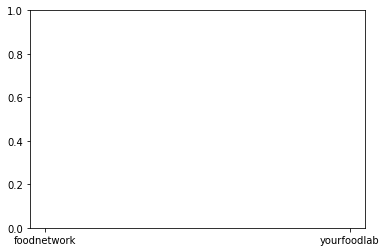

In [75]:
plt.bar(insta_handle,avg_follower)
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()